In [2]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn.objects as so
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import warnings
import json
import os
from pathlib import Path
warnings.filterwarnings('ignore')

dataset_path = Path('./')
for file in dataset_path.iterdir():
    if file.suffix == '.csv':
        df = pd.read_csv(file)
        print(file)

State_of_data_BR_2023_Kaggle-df_survey_2023.csv


# Carregando dataset

In [3]:
df.shape

(5293, 399)

In [4]:
df.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.iloc[:, 6:15].head()

,"('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')","('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')","('P1_f ', 'aspectos_prejudicados')","('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')","('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')","('P1_f_3', 'Aprovação em processos seletivos/entrevistas')"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,0.0,Atenção dada pelas pessoas diante das minhas o...,1.0,0.0,1.0
3,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df["('P1_e ', 'experiencia_profissional_prejudicada')"].dropna().iloc[13]

'Sim, acredito que a minha a experiência profissional seja afetada devido a minha identidade de gênero'

In [6]:
df.describe()

,"('P1_a ', 'Idade')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')","('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')","('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')","('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')","('P1_f_3', 'Aprovação em processos seletivos/entrevistas')","('P1_f_4', 'Oportunidades de progressão de carreira')","('P1_f_5', 'Velocidade de progressão de carreira')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
count,5293.000000,2719.000000,2719.000000,2719.000000,2719.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,...,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,31.997166,0.542111,0.202648,0.291284,0.024641,0.389558,0.342972,0.413655,0.490763,0.516466,...,0.243316,0.315508,0.070856,0.093583,0.045455,0.009358,0.025401,0.020053,0.024064,0.048128
std,7.623498,0.498315,0.402046,0.454437,0.155058,0.487846,0.474893,0.492686,0.500116,0.499930,...,0.429371,0.465029,0.256755,0.291442,0.208438,0.096349,0.157445,0.140277,0.153351,0.214181
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['('P0', 'id')', '('P1_a ', 'Idade')', '('P1_a_1 ', 'Faixa idade')',
       '('P1_b ', 'Genero')', '('P1_c ', 'Cor/raca/etnia')',
       '('P1_d ', 'PCD')', '('P1_e ', 'experiencia_profissional_prejudicada')',
       '('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')',
       '('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')',
       '('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')',
       ...
       '('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')',
       '('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')',
       '('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')',
       '('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento,

# Tratando dataframe e criando objetos auxiliares 

Nesta etapa, criaremos objetos auxiliares para melhor analisar os dados. Utilizaremos um id como nome de coluna (para qualidade de vida). Criaremos um dataframe com o de-para desse id para a pergunta por extenso, incluindo segmentações das perguntas, seguindo o dicionário fornecido 


*3 Sobre os dados da Pesquisa*

*O questionário foi dividido em 8 partes, e dentro de cada uma das partes temos as perguntas e opções de escolha.*

*Parte 1 - Dados demográficos*

*Parte 2 - Dados sobre carreira*

*Parte 3 - Desafios dos gestores de times de dados*

*Parte 4 - Conhecimentos na área de dados*

*Parte 5 - Objetivos na área de dados*

*Parte 6 - Conhecimentos em Engenharia de Dados/DE*

*Parte 7 - Conhecimentos em Análise de Dados/DA*

*Parte 8 - Conhecimentos em Ciências de Dados/DS*

*Cada pergunta é dividida em Parte, Letra da Pergunta, Número da Opção escolhida*
*Exemplo: P3a_1 = Parte 3, pergunta (a), opção (1)*

In [9]:
# Criando dicionário com nome de colunas
keys_questions_id = [
    name
    .split('\',')
    [0]
    .replace('(', '')
    .replace('\'', '')
    .replace(' ', '') 
    for name in df.columns
]

values_questions_id = [
    name
    .split('\',')
    [1]
    .replace(')', '')
    .replace('\'', '') 
    [1:]
    for name in df.columns
]

# Create dict
dict_questions_id = {
    key: value
    for key, value in zip(keys_questions_id, values_questions_id)
}

In [10]:
# DF auxiliar para avaliar e segmentar perguntas
questions_df = pd.DataFrame(dict_questions_id, index=['Pergunta']).T.reset_index().rename(columns={'index': 'col_id'})

In [11]:
# Tratando df auxiliar
questions_df = (
    questions_df.assign(
        Parte_id=lambda df_: df_['col_id'].str.replace('P', '').str.split('_', expand=True)[0],
        Pergunta_id=lambda df_: df_['col_id'].str.replace('P', '').str.split('_', expand=True)[1],
        Opcao_id=lambda df_: df_['col_id'].str.replace('P', '').str.split('_', expand=True)[2],
    )
    .merge(
        pd.DataFrame({
            'Parte_id': [str(x) for x in range(9)],
            'Parte': [
                'id',
                'Dados demográficos',
                'Dados sobre carreira',
                'Desafios dos gestores de times de dados',
                'Conhecimentos na área de dados',
                'Objetivos na área de dados',
                'Conhecimentos em Engenharia de Dados/DE',
                'Conhecimentos em Análise de Dados/DA',
                'Conhecimentos em Ciências de Dados/DS'
            ]
        }),
        on='Parte_id',
        how='left'
    )
)

In [12]:
## Tratando nome das colunas e criando colunas com identificadores das perguntas
new_column_names = [name.split(',')[1].replace(')', '').replace('\'', '') for name in df.columns]

In [13]:
# Renomeando colunas no df original
df.columns = keys_questions_id

In [14]:
questions_df.head()

,col_id,Pergunta,Parte_id,Pergunta_id,Opcao_id,Parte
0,P0,id,0,None,None,id
1,P1_a,Idade,1,a,None,Dados demográficos
2,P1_a_1,Faixa idade,1,a,1,Dados demográficos
3,P1_b,Genero,1,b,None,Dados demográficos
4,P1_c,Cor/raca/etnia,1,c,None,Dados demográficos


In [15]:
# Adicionar uma coluna com a quantidade de respostas diferentes por pergunta
questions_df = (
    questions_df
    .assign(
        qtd_respostas=lambda df_: df_['col_id'].apply(lambda x: df[x].nunique())
    )
)

,col_id,Pergunta,Parte_id,Pergunta_id,Opcao_id,Parte,qtd_respostas
0,P0,id,0,None,None,id,5293
1,P1_a,Idade,1,a,None,Dados demográficos,53
2,P1_a_1,Faixa idade,1,a,1,Dados demográficos,9
3,P1_b,Genero,1,b,None,Dados demográficos,4
4,P1_c,Cor/raca/etnia,1,c,None,Dados demográficos,7


In [18]:
df.head(1)

,P0,P1_a,P1_a_1,P1_b,P1_c,P1_d,P1_e,P1_e_1,P1_e_2,P1_e_3,...,P8_d_3,P8_d_4,P8_d_5,P8_d_6,P8_d_7,P8_d_8,P8_d_9,P8_d_10,P8_d_11,P8_d_12
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
questions_df.head(10)

,col_id,Pergunta,Parte_id,Pergunta_id,Opcao_id,Parte,qtd_respostas
0,P0,id,0,None,None,id,5293
1,P1_a,Idade,1,a,None,Dados demográficos,53
2,P1_a_1,Faixa idade,1,a,1,Dados demográficos,9
3,P1_b,Genero,1,b,None,Dados demográficos,4
4,P1_c,Cor/raca/etnia,1,c,None,Dados demográficos,7
5,P1_d,PCD,1,d,None,Dados demográficos,3
6,P1_e,experiencia_profissional_prejudicada,1,e,None,Dados demográficos,17
7,P1_e_1,Não acredito que minha experiência profissiona...,1,e,1,Dados demográficos,2
8,P1_e_2,Experiencia prejudicada devido a minha Cor Raç...,1,e,2,Dados demográficos,2
9,P1_e_3,Experiencia prejudicada devido a minha identid...,1,e,3,Dados demográficos,2


In [15]:
# Save each "pergunta" divided by "parte" on a json file

questions_and_choices_on_each_part = questions_df.groupby('Parte_id').apply(lambda x: x.to_dict(orient='records'))
questions_and_choices_on_each_part = {part: questions for part, questions in questions_and_choices_on_each_part.items()}

# Save to json
if not dataset_path.joinpath('questions_and_choices_on_each_part.json').exists():
    os.makedirs(dataset_path.joinpath('questions_and_choices_on_each_part.json').parent, exist_ok=True)
with open('questions_and_choices_on_each_part.json', 'w', encoding="utf-8") as f:
    json.dump(questions_and_choices_on_each_part, f, ensure_ascii=False, indent=4)

# Save only the question of each part, wich means use only "question" and remove the "option" (P3_a_1 = Part 3, question (a), option (1))
# Create a df where all Opcao_id different from None is removed
only_question_df = questions_df[questions_df['Opcao_id'].isnull()]
questions_on_each_part = only_question_df.groupby('Parte_id').apply(lambda x: x.to_dict(orient='records'))
questions_on_each_part = {part: questions for part, questions in questions_on_each_part.items()}

# Save to json
if not dataset_path.joinpath('questions_on_each_part.json').exists():
    os.makedirs(dataset_path.joinpath('questions_on_each_part.json').parent, exist_ok=True)
with open('questions_on_each_part.json', 'w', encoding="utf-8") as f:
    json.dump(questions_on_each_part, f, ensure_ascii=False, indent=4)

# Análises gerais

In [16]:
print(f'Número de participantes da pesquisa: {df["P0"].nunique()}')
print(f'Número de linhas: {df.shape[0]}')
total_participantes = df["P0"].nunique()

Número de participantes da pesquisa: 5293
Número de linhas: 5293


De fato, temos uma linha por participante

In [17]:
# Análise de valores nulos
df.isna().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
index,P0,P1_a,P1_a_1,P1_b,P1_c,P1_d,P1_e,P1_e_1,P1_e_2,P1_e_3,...,P8_d_3,P8_d_4,P8_d_5,P8_d_6,P8_d_7,P8_d_8,P8_d_9,P8_d_10,P8_d_11,P8_d_12
0,0,0,0,0,0,0,2574,2574,2574,2574,...,4545,4545,4545,4545,4545,4545,4545,4545,4545,4545


Apenas olhando para esse snippet, várias colunas tem o mesmo número de linhas nulas. Deve ser o caso de questões de múltipla escolha, e que a opção não foi selecionada. Vamos investigar um pouco (por exemplo, a P8a)

In [18]:
questions_df[questions_df['col_id'].str.startswith('P8_a')]

,col_id,Pergunta,Parte_id,Pergunta_id,Opcao_id,Parte
346,P8_a,Quais das opções abaixo fazem parte da sua rot...,8,a,None,Conhecimentos em Ciências de Dados/DS
347,P8_a_1,Estudos Ad-hoc com o objetivo de confirmar hip...,8,a,1,Conhecimentos em Ciências de Dados/DS
348,P8_a_2,Sou responsável pela coleta e limpeza dos dado...,8,a,2,Conhecimentos em Ciências de Dados/DS
349,P8_a_3,Sou responsável por entrar em contato com os t...,8,a,3,Conhecimentos em Ciências de Dados/DS
350,P8_a_4,Desenvolvo modelos de Machine Learning com o o...,8,a,4,Conhecimentos em Ciências de Dados/DS
351,P8_a_5,Sou responsável por colocar modelos em produçã...,8,a,5,Conhecimentos em Ciências de Dados/DS
352,P8_a_6,Cuido da manutenção de modelos de Machine Lear...,8,a,6,Conhecimentos em Ciências de Dados/DS
353,P8_a_7,Realizo construções de dashboards em ferrament...,8,a,7,Conhecimentos em Ciências de Dados/DS
354,P8_a_8,Utilizo ferramentas avançadas de estatística c...,8,a,8,Conhecimentos em Ciências de Dados/DS
355,P8_a_9,"Crio e dou manutenção em ETLs, DAGs e automaçõ...",8,a,9,Conhecimentos em Ciências de Dados/DS


Confirmamos a hipótese. Com isso, temos uma noção de que para perguntas com múltiplas opções, valores nulos potencialmente terão um significado especial. Vamos confirmar isso analisando se aparecem como 0 ou nulo na base:

In [19]:
df.head(1)

,P0,P1_a,P1_a_1,P1_b,P1_c,P1_d,P1_e,P1_e_1,P1_e_2,P1_e_3,...,P8_d_3,P8_d_4,P8_d_5,P8_d_6,P8_d_7,P8_d_8,P8_d_9,P8_d_10,P8_d_11,P8_d_12
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
(
    df
    .loc[:, [col for col in df.columns if col.startswith('P8_a')]]
    .loc[lambda df_: df_['P8_a'].notnull()]
)

,P8_a,P8_a_1,P8_a_2,P8_a_3,P8_a_4,P8_a_5,P8_a_6,P8_a_7,P8_a_8,P8_a_9,P8_a_10,P8_a_11,P8_a_12
0,Treinando e aplicando LLM's para solucionar pr...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Sou responsável pela coleta e limpeza dos dado...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,Estudos Ad-hoc com o objetivo de confirmar hip...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
29,Estudos Ad-hoc com o objetivo de confirmar hip...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31,Estudos Ad-hoc com o objetivo de confirmar hip...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,Estudos Ad-hoc com o objetivo de confirmar hip...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5276,Nenhuma das opções listadas refletem meu dia a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5278,Estudos Ad-hoc com o objetivo de confirmar hip...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5287,Estudos Ad-hoc com o objetivo de confirmar hip...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


Neste caso, para colunas com opções (sufixos com letras "\_a", "\_b", etc) Vamos ter uma coluna com a concatenação das respostas em si, por extenso, com a coluna sem opções (e.g P8\_a) e colunas com booleanos (formato inteiro) com as opções selecionadas ou não (1 ou 0). Valores nulos correspondem (por hipótese) a respostas não preenchidas.

Vamos começar analisando pergunta por pergunta, de acordo com a parte

# Parte 1 - Dados demográficos

In [21]:
df['P1_a'].describe(percentiles=np.arange(0.1, 1.1, 0.1)).round()

count    5293.0
mean       32.0
std         8.0
min        18.0
10%        24.0
20%        26.0
30%        27.0
40%        29.0
50%        30.0
60%        32.0
70%        35.0
80%        37.0
90%        42.0
100%       73.0
max        73.0
Name: P1_a, dtype: float64

## Idade

[]

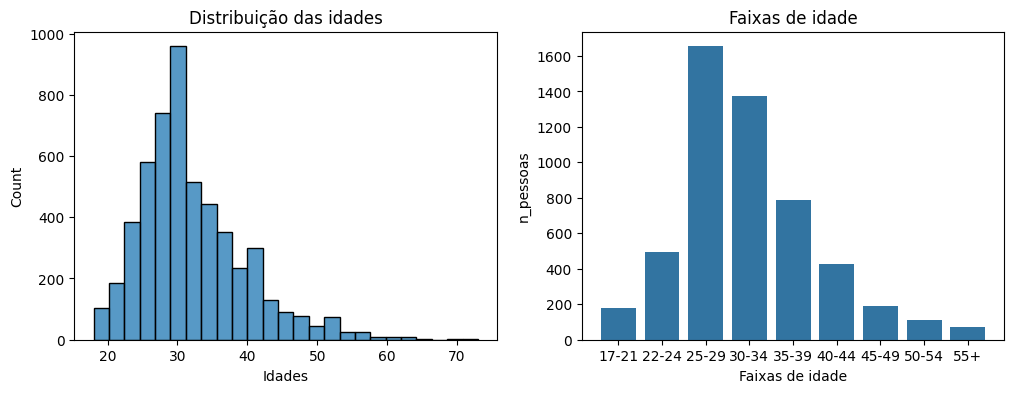

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(
    data=df, 
    x='P1_a',
    bins=25,
    ax=ax[0]
)
ax[0].set_title('Distribuição das idades')
ax[0].set_xlabel('Idades')

sns.barplot(
    data=df.groupby('P1_a_1').agg(n_pessoas=('P0', 'nunique')).reset_index(), 
    x='P1_a_1',
    y='n_pessoas',
    ax=ax[1]
)
ax[1].set_title('Faixas de idade')
ax[1].set_xlabel('Faixas de idade')


plt.plot()

Temos uma distribuição centrada em torno dos 30 anos de idade, com a maior faixa de idade dos profissionais que responderam a pesquisa entre 25-29

## Gênero

In [23]:
def value_counts_answer(df, col_id):
    display(
        df
        [col_id]
        .value_counts(dropna=False)
        .reset_index()
        .merge(
            df
            [col_id]
            .value_counts(normalize=True, dropna=False)
            .reset_index()
        )
    )

In [24]:
value_counts_answer(df, 'P1_b')

,P1_b,count,proportion
0,Masculino,3975,0.750992
1,Feminino,1293,0.244285
2,Prefiro não informar,16,0.003023
3,Outro,9,0.001700


Temos uma proporção geral de 75:25 (aproximadamente) de homens para mulheres na pesquisa. É uma discrepância significativa em relação à população brasileira em geral (cerca de 50:50, com maioria para mulheres)

https://agenciabrasil.ebc.com.br/direitos-humanos/noticia/2023-10/censo-2022-mulheres-sao-maioria-em-todas-regioes-pela-primeira-vez

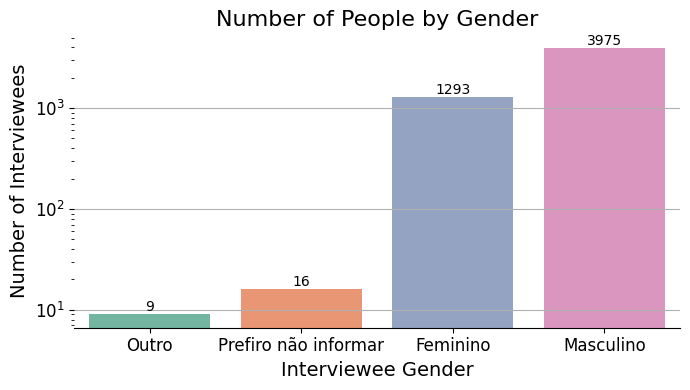

'\nConcerning possible bias when using the State of Data Brazil 2023 dataset, there are some interviewee characteristics that could add misleading attributes to a machine learning model, which could skew results. \n\nThe first of the characteristics is the age of the interviewees, shown on figure XX. The dataset has a higher number of interviewees in the age range of 25 to 35 years old, which could lead to a bias in the model that could be skewed towards this age group.\n\nThe second characteristic is the gender of the interviewees, shown on figure XX. The dataset has a higher number of male interviewees. On top of that, there are very few interviewees that identify as gender other than male or female.\n'

In [25]:
# Sort the dataframe by 'n_pessoas' column in descending order
df_sorted = df.groupby('P1_b').agg(n_pessoas=('P0', 'nunique')).reset_index().sort_values('n_pessoas', ascending=True)

fig, ax = plt.subplots(figsize=(7, 4))

sns.barplot(
    data=df_sorted, 
    x='P1_b',
    y='n_pessoas',
    ax=ax,
    palette=sns.color_palette("Set2")
)

ax.set_yscale('log')
ax.set_title('Number of People by Gender', fontsize=16)
ax.set_xlabel('Interviewee Gender', fontsize=14)
ax.set_ylabel('Number of Interviewees', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)

# Add bar values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=10)

ax.yaxis.grid(True)  # Add horizontal lines

sns.despine(left=True)
plt.tight_layout()
plt.savefig('PeopleByGender.png', dpi=300)
plt.show()



In [26]:
# Percentage of people by gender
percentage_people_by_gender = df['P1_b'].value_counts(normalize=True).reset_index().rename(columns={'P1_b': 'Gender', "proportion": "Percentage"}).round(4)
percentage_people_by_gender['Percentage'] = percentage_people_by_gender['Percentage'] * 100
percentage_people_by_gender

,Gender,Percentage
0,Masculino,75.10
1,Feminino,24.43
2,Prefiro não informar,0.30
3,Outro,0.17


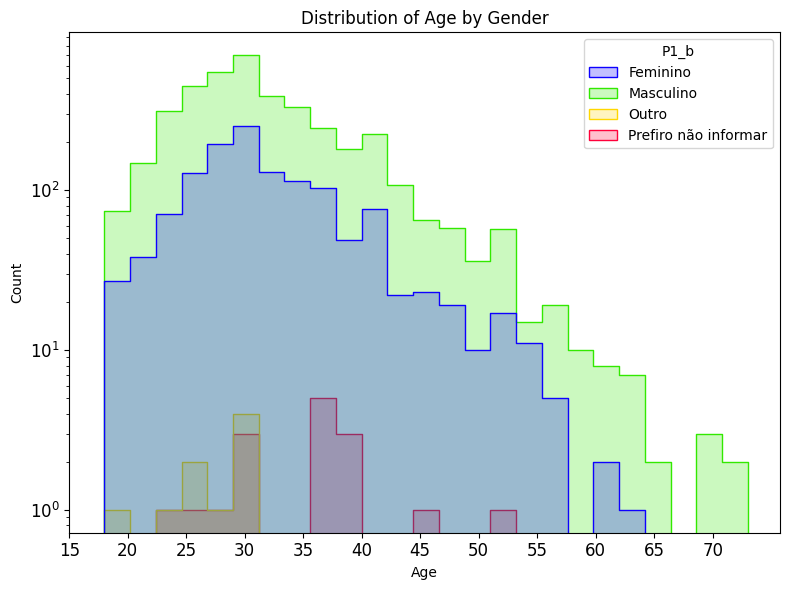

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(
    data=df.sort_values(by='P1_b'), 
    x='P1_a',
    hue="P1_b", 
    element="step",
    bins=25,
    ax=ax,
    palette=sns.color_palette("prism", 5)
)

ax.set_yscale('log')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age by Gender')

plt.xticks(np.arange(15, df['P1_a'].max()+1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('plot.png', dpi=300)
plt.show()

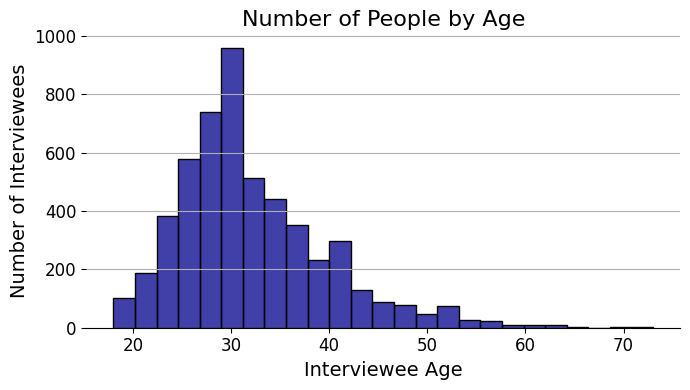

'\nConcerning possible bias when using the State of Data Brazil 2023 dataset, there are some interviewee characteristics that could add misleading attributes to a machine learning model, which could skew results. \n\nThe first of the characteristics is the age of the interviewees, shown on figure XX. The dataset has a higher number of interviewees in the age range of 25 to 35 years old, which could lead to a bias in the model that could be skewed towards this age group.\n'

In [28]:
# Sort the dataframe by 'n_pessoas' column in descending order
fig, ax = plt.subplots(figsize=(7, 4))

sns.histplot(
    data=df, 
    x='P1_a',
    bins=25,
    ax=ax,
    color='darkblue',
    palette=sns.color_palette("cool")
)

ax.set_title('Number of People by Age', fontsize=16)
ax.set_xlabel('Interviewee Age', fontsize=14)
ax.set_ylabel('Number of Interviewees', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.yaxis.grid(True)  # Add horizontal lines

sns.despine(left=True)

plt.tight_layout()
plt.savefig('PeopleByAge.png', dpi=300)
plt.show()

Esta distribuição parece se manter tanto para as idades das pessoas do gênero masculino como feminino. A proporção geral da população é de aproximadamente 75% do gênero masculino, e 25% do gênero feminino + outros + não preferiu responder. Este resultado já é esperado, pelo perfil "geral" dos profissionais de dados e o que observamos empiricamente em muitas empresas. Vamos investigar se essa tendência, ao menos, tem melhorado com o tempo, com uma proporção mais igualitária para menores faixas de idade

In [29]:
fig = px.bar(
    (
        df
        .groupby(['P1_a_1', 'P1_b'])
        .agg(n_pessoas=('P0', 'nunique'))
        .reset_index()
        .assign(perc=lambda df_: (100 * df_['n_pessoas'] / df_.groupby('P1_a_1')['n_pessoas'].transform('sum')).round(decimals=2))
    ), 
    x="P1_a_1", 
    y="perc", 
    color="P1_b", 
    title="Percentual de pessoas por gênero e por faixa de idade",
    color_discrete_map={
        'Feminino': 'indianred',
        'Masculino': 'deepskyblue',
        'Outro': 'teal',
        'Prefiro não informar': 'plum'
    }
    
)

fig.update_layout(
    xaxis_title="Faixa de idade",
    yaxis_title="Percentual",
    legend_title="Gênero",
)

fig.show()

Infelizmente, a proporção para todas as faixas de idade parece estável, oscilando sempre em torno do 75:25 (e até 80:20). Pode ser um indicativo de uma necessidade para medidas inclusivas para processos seletivos

## Cor

In [30]:
value_counts_answer(df, 'P1_c')

,P1_c,count,proportion
0,Branca,3414,0.645003
1,Parda,1281,0.242018
2,Preta,387,0.073115
3,Amarela,147,0.027773
4,Prefiro não informar,34,0.006424
5,Outra,18,0.003401
6,Indígena,12,0.002267


In [31]:
(
    df
    .P1_c
    .value_counts()
    .reset_index()
    .merge(
        df
        .P1_c
        .value_counts(normalize=True)
        .reset_index()
    )
)

,P1_c,count,proportion
0,Branca,3414,0.645003
1,Parda,1281,0.242018
2,Preta,387,0.073115
3,Amarela,147,0.027773
4,Prefiro não informar,34,0.006424
5,Outra,18,0.003401
6,Indígena,12,0.002267


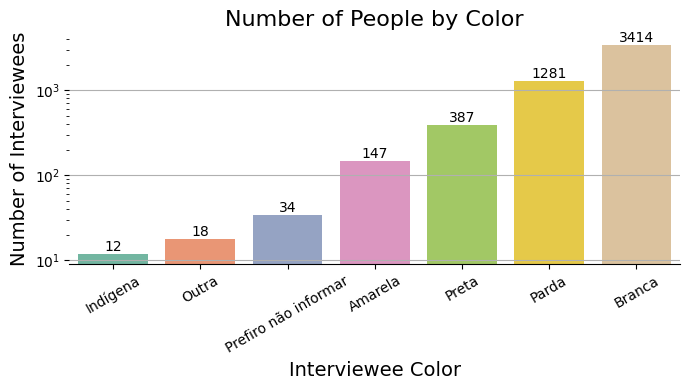

'\nConcerning possible bias when using the State of Data Brazil 2023 dataset, there are some interviewee characteristics that could add misleading attributes to a machine learning model, which could skew results. \n\nThe first of the characteristics is the age of the interviewees, shown on figure XX. The dataset has a higher number of interviewees in the age range of 25 to 35 years old, which could lead to a bias in the model that could be skewed towards this age group.\n\nThe second characteristic is the gender of the interviewees, shown on figure XX. The dataset has a higher number of male interviewees. On top of that, there are very few interviewees that identify as gender other than male or female.\n\nThe third characteristic is the color of the interviewees, shown on figure XX. The dataset has a higher number of interviewees that identify as white, which differs from the Brazilian population, where white color is present for 43,5% of the total population (https://censo2022.ibge.go

In [32]:
# Sort the dataframe by 'n_pessoas' column in descending order
df_sorted = df.groupby('P1_c').agg(n_pessoas=('P0', 'nunique')).reset_index().sort_values('n_pessoas', ascending=True)

fig, ax = plt.subplots(figsize=(7, 4))


sns.barplot(
    data=df_sorted,
    x='P1_c',
    y='n_pessoas',
    ax=ax,
    palette=sns.color_palette("Set2")
)
ax.set_yscale('log')
ax.set_title('Number of People by Color', fontsize=16)
ax.set_xlabel('Interviewee Color', fontsize=14)
ax.set_ylabel('Number of Interviewees', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=10)

# Rotate x-axis labels
plt.xticks(rotation=30)

# Add bar values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

ax.yaxis.grid(True)  # Add horizontal lines

sns.despine(left=True)
plt.tight_layout()
plt.savefig('PeopleByColor.png', dpi=300)
plt.show()

In [33]:
# Percentage of people by color
percentage_people_by_color = df['P1_c'].value_counts(normalize=True).reset_index().rename(columns={'P1_c': 'Color', "proportion": "Percentage"}).round(4)
percentage_people_by_color['Percentage'] = percentage_people_by_color['Percentage'] * 100
percentage_people_by_color

,Color,Percentage
0,Branca,64.50
1,Parda,24.20
2,Preta,7.31
3,Amarela,2.78
4,Prefiro não informar,0.64
5,Outra,0.34
6,Indígena,0.23


[]

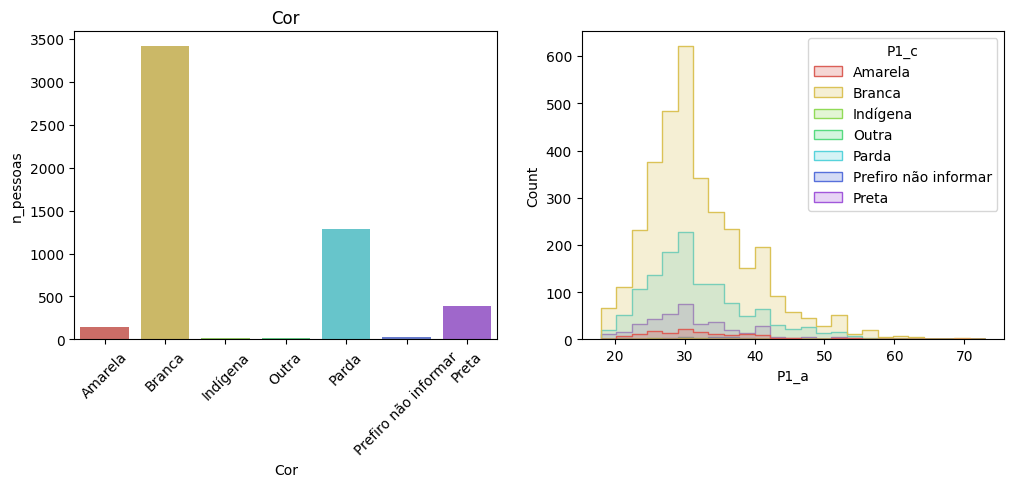

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(
    data=df.groupby('P1_c',).agg(n_pessoas=('P0', 'nunique')).reset_index(), 
    x='P1_c',
    y='n_pessoas',
    ax=ax[0],
    palette=sns.color_palette("hls", 8)
)
ax[0].set_title('Cor')
ax[0].set_xlabel('Cor')


sns.histplot(
    df.sort_values(by='P1_c'), 
    x='P1_a',
    hue="P1_c", 
    element="step",
    bins=25,
    ax=ax[1],
    palette=sns.color_palette("hls", 8)
)
ax[0].tick_params(axis='x', rotation=45)
plt.plot()

Da mesma maneira que temos uma desproporção em profissionais do gênero masculino, também temos uma desproporção em usuários da cor branca (visto que 45% da população se declara branca segundo o senso 2022)

(https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/38719-censo-2022-pela-primeira-vez-desde-1991-a-maior-parte-da-populacao-do-brasil-se-declara-parda&ved=2ahUKEwj-t6GhuoGHAxVotJUCHR68Cw8QFnoECBIQAw&usg=AOvVaw1YvTllBTxvErhoe34Mqc_1)

O fenômeno tem permanecido para todas as faixas de idade, tal qual para gênero.

# Region

In [35]:
(
    df
    .P1_i_2
    .value_counts(normalize=True, dropna=False)
    .reset_index()
    .rename(columns={'P1_i_2': 'Região'})
    .assign(proportion_cumsum=lambda df_: df_['proportion'].cumsum())
    .round(decimals=4)
)

,Região,proportion,proportion_cumsum
0,Sudeste,0.5995,0.5995
1,Sul,0.1816,0.7810
2,Nordeste,0.1149,0.8959
3,Centro-oeste,0.0650,0.9609
4,NaN,0.0234,0.9843
5,Norte,0.0157,1.0000


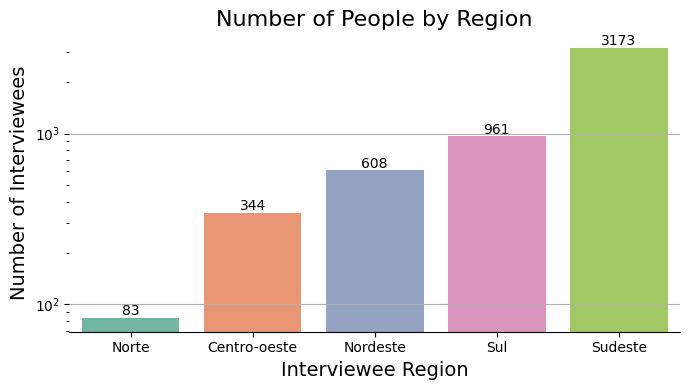

'\nConcerning possible bias when using the State of Data Brazil 2023 dataset, there are some interviewee characteristics that could add misleading attributes to a machine learning model, which could skew results. \n\nThe first of the characteristics is the age of the interviewees, shown on figure XX. The dataset has a higher number of interviewees in the age range of 25 to 35 years old, which could lead to a bias in the model that could be skewed towards this age group.\n\nThe second characteristic is the gender of the interviewees, shown on figure XX. The dataset has a higher number of male interviewees. On top of that, there are very few interviewees that identify as gender other than male or female.\n\nThe third characteristic is the color of the interviewees, shown on figure XX. The dataset has a higher number of interviewees that identify as white, which differs from the Brazilian population, where white color is present for 43,5% of the total population (https://censo2022.ibge.go

In [36]:
# Sort the dataframe by 'n_pessoas' column in descending order
df_sorted = df.groupby('P1_i_2').agg(n_pessoas=('P0', 'nunique')).reset_index().sort_values('n_pessoas', ascending=True)

fig, ax = plt.subplots(figsize=(7, 4))

sns.barplot(
    data=df_sorted,
    x='P1_i_2',
    y='n_pessoas',
    ax=ax,
    palette=sns.color_palette("Set2")
)

ax.set_yscale('log')
ax.set_title('Number of People by Region', fontsize=16)
ax.set_xlabel('Interviewee Region', fontsize=14)
ax.set_ylabel('Number of Interviewees', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=10)


# Add bar values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

ax.yaxis.grid(True)  # Add horizontal lines

sns.despine(left=True)

plt.tight_layout()
plt.savefig('PeopleByRegion.png', dpi=300)
plt.show()


In [37]:
# Percentage of people by region
percentage_people_by_region = df['P1_i_2'].value_counts(normalize=True).reset_index().rename(columns={'P1_i_2': 'Region', "proportion": "Percentage"}).round(4)
percentage_people_by_region['Percentage'] = percentage_people_by_region['Percentage'] * 100
percentage_people_by_region

,Region,Percentage
0,Sudeste,61.39
1,Sul,18.59
2,Nordeste,11.76
3,Centro-oeste,6.66
4,Norte,1.61


# Salary

In [49]:
df_fixed = df.groupby('P2_h').agg(n_pessoas=('P0', 'nunique')).reset_index().sort_values('n_pessoas', ascending=True)

# remove wrong column "de R$ 101/mês a R$ 2.000/mês"
df_fixed = df_fixed[df_fixed['P2_h'] != 'de R$ 101/mês a R$ 2.000/mês']
# Add 1 to the value of column "de R$ 1.001/mês a R$ 2.000/mês"
df_fixed.loc[df_fixed['P2_h'] == 'de R$ 1.001/mês a R$ 2.000/mês', 'n_pessoas'] += 1
df_fixed

,P2_h,n_pessoas
1,Menos de R$ 1.000/mês,30
0,Acima de R$ 40.001/mês,72
10,de R$ 30.001/mês a R$ 40.000/mês,86
8,de R$ 25.001/mês a R$ 30.000/mês,128
7,de R$ 20.001/mês a R$ 25.000/mês,195
2,de R$ 1.001/mês a R$ 2.000/mês,216
6,de R$ 2.001/mês a R$ 3.000/mês,288
5,de R$ 16.001/mês a R$ 20.000/mês,328
9,de R$ 3.001/mês a R$ 4.000/mês,352
12,de R$ 6.001/mês a R$ 8.000/mês,637


In [50]:
import re


# Função para extrair os números de uma string usando expressões regulares
def extract_numbers(text: float) -> int:
    text = str(text)
    numbers = re.findall(r'\d+', text)
    return int(numbers[0]) if numbers else 0

# Aplicar a função extract_numbers à coluna 'salarios' para extrair os números
df_fixed['P2_h'] = df_fixed['P2_h'].apply(extract_numbers)


# Classificar os salários em ordem ascendente
df_fixed = df_fixed.sort_values('P2_h')


# Remove last row
# df_fixed = df_fixed.iloc[:-1]

# Renomear as linhas com base nos salários classificados
new_names = ['less than 1.000', '1.001 - 2.000', '2.001 - 3.000', '3.001 - 4.000', '4.001 - 6.000', '6.001 - 8.000', '8.001 - 12.000', '12.001 - 16.000', '16.001 - 20.000', '20.001 - 25.000', '25.001 - 30.000', '30.001 - 40.000', '40.001 or more']
df_fixed['P2_h'] = new_names

# Resultado final
df_fixed


                                P2_h  n_pessoas
1              Menos de R$ 1.000/mês         30
0             Acima de R$ 40.001/mês         72
10  de R$ 30.001/mês a R$ 40.000/mês         86
8   de R$ 25.001/mês a R$ 30.000/mês        128
7   de R$ 20.001/mês a R$ 25.000/mês        195
2     de R$ 1.001/mês a R$ 2.000/mês        216
6     de R$ 2.001/mês a R$ 3.000/mês        288
5   de R$ 16.001/mês a R$ 20.000/mês        328
9     de R$ 3.001/mês a R$ 4.000/mês        352
12    de R$ 6.001/mês a R$ 8.000/mês        637
4   de R$ 12.001/mês a R$ 16.000/mês        650
11    de R$ 4.001/mês a R$ 6.000/mês        745
13   de R$ 8.001/mês a R$ 12.000/mês       1026
    P2_h  n_pessoas
1      1         30
0     40         72
10    30         86
8     25        128
7     20        195
2      1        216
6      2        288
5     16        328
9      3        352
12     6        637
4     12        650
11     4        745
13     8       1026
    P2_h  n_pessoas
1      1         30
2      1

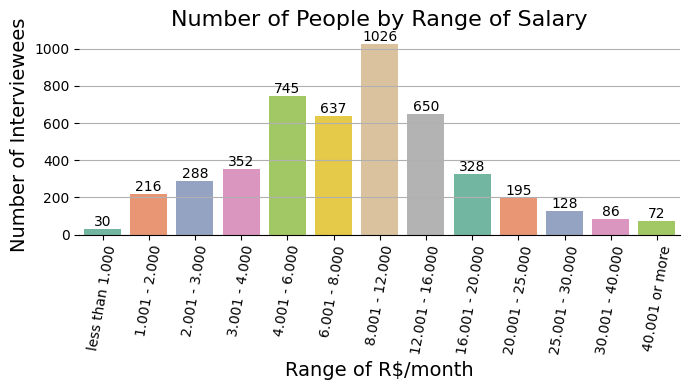

'\nConcerning possible bias when using the State of Data Brazil 2023 dataset, there are some interviewee characteristics that could add misleading attributes to a machine learning model, which could skew results. \n\nThe first of the characteristics is the age of the interviewees, shown on figure XX. The dataset has a higher number of interviewees in the age range of 25 to 35 years old, which could lead to a bias in the model that could be skewed towards this age group.\n\nThe second characteristic is the gender of the interviewees, shown on figure XX. The dataset has a higher number of male interviewees. On top of that, there are very few interviewees that identify as gender other than male or female.\n\nThe third characteristic is the color of the interviewees, shown on figure XX. The dataset has a higher number of interviewees that identify as white, which differs from the Brazilian population, where white color is present for 43,5% of the total population (https://censo2022.ibge.go

In [55]:
# Sort the dataframe by 'n_pessoas' column in descending order

fig, ax = plt.subplots(figsize=(7, 4))

sns.barplot(
    data=df_fixed,
    x='P2_h',
    y='n_pessoas',
    ax=ax,
    palette=sns.color_palette("Set2")
)

#ax.set_yscale('log')
ax.set_title('Number of People by Range of Salary', fontsize=16)
ax.set_xlabel('Range of R$/month', fontsize=14)
ax.set_ylabel('Number of Interviewees', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=10)


# Add bar values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

ax.yaxis.grid(True)  # Add horizontal lines

# Curvature of the x-axis labels
plt.xticks(rotation=80)

sns.despine(left=True)

plt.tight_layout()
plt.savefig('PeopleBySalaryRange.png', dpi=300)
plt.show()


## PCD

In [ ]:
value_counts_answer(df, 'P1_d')

,P1_d,count,proportion
0,Não,5156,0.974117
1,Sim,111,0.020971
2,Prefiro não informar,26,0.004912


97% dos profissionais responderam que não se declaram PCD. A prevalência de 3% aproximadamente está um tanto distante do que encontramos na população geral, segundo dados do IBGE (8%)

https://www.gov.br/mdh/pt-br/assuntos/noticias/2023/julho/brasil-tem-18-6-milhoes-de-pessoas-com-deficiencia-indica-pesquisa-divulgada-pelo-ibge-e-mdhc

Analisando estes dados brutos até então, temos algumas evidências de desigualdade dentre os profissionais de dados. A mais gritante, principalmente pela proporção na população, é a de gênero. 

Vamos analisar como esses pontos impactam a vida destes profissionais

## Experiência prejudicada

In [ ]:
col_id_prefix = 'P1_e_'
question = questions_df.loc[questions_df.col_id == f'{col_id_prefix[:-1]}'].Pergunta.values[0]
max_width = 20
xpad = -0.2
ypad = 25

In [ ]:
def summary_multiple_choice_questions(df, col_id_prefix):
    total_pessoas = df['P0'].nunique()
    return (
        df
        [[col for col in df.columns if col.startswith(col_id_prefix)]]
        .assign(**{f'{col_id_prefix}' + 'null':lambda df_: df_[f'{col_id_prefix}' + '1'].isnull().astype(int)})
        .sum()
        .reset_index()
        .rename(columns={'index': 'col_id', 0: 'num_pessoas'})
        .assign(
            total_pessoas=total_pessoas,
            perc_pessoas = lambda df_: (100 * df_['num_pessoas'] / df_['total_pessoas']).round(decimals=2)
        )
        .merge(questions_df[['col_id', 'Pergunta']], how='left')
        .fillna(value='Não respondeu')
    
    )

In [ ]:
def plot_multiple_choice_questions(
    df, 
    col_id_prefix, 
    question, 
    max_width, 
    xpad, 
    ypad,
    plot_percentage=True,
    figsize=(12, 4)
):
    fig, ax = plt.subplots(figsize=figsize)

    data = summary_multiple_choice_questions(df, col_id_prefix)

    sns.barplot(
        data=data,
        x='Pergunta',
        y='num_pessoas',
        ax=ax
    )
    ax.set_title('Respostas - ' + question)
    ax.set_xlabel(question)

    ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
    
    if plot_percentage:
        for i, p in enumerate(ax.patches):
            percentage = summary_multiple_choice_questions(df, col_id_prefix).perc_pessoas.values.tolist()
            x = p.get_x() + p.get_width() + xpad
            y = p.get_height() + ypad
            ax.annotate(str(percentage[i]) + '%', (x, y), ha='right')
    plt.grid(axis='y', linestyle='--')
    plt.plot()

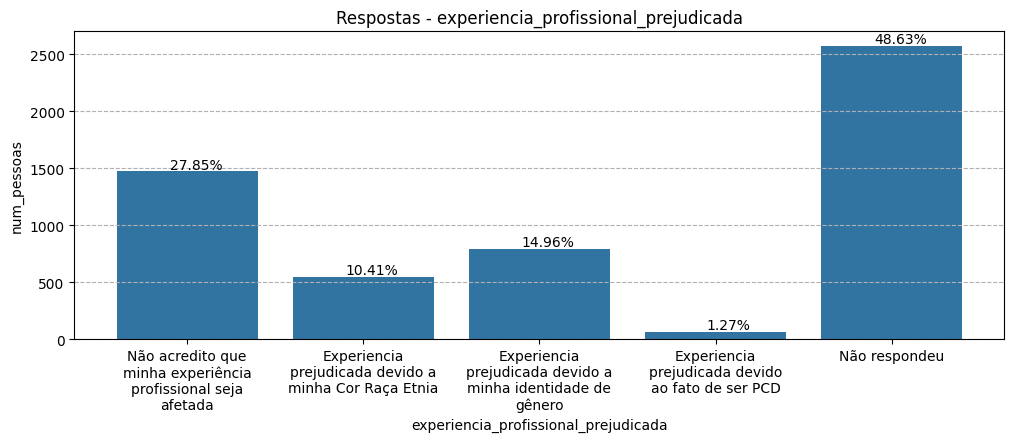

In [ ]:
plot_multiple_choice_questions(df, col_id_prefix, question, max_width, xpad, ypad)

Para os gráficos abaixo, vamos considerar pessoas não-brancas, pessoas de gênero não-masculino, e PCD como "minorias", e vamos avaliar as minorias responderam estas perguntas

In [ ]:
df_min_genero = (
    df
    .assign(minoria_genero=lambda df_: df_['P1_b'] != 'Masculino')
    .fillna(-1)
    [['P0', 'minoria_genero', 'P1_e_1', 'P1_e_3']]
    .groupby(['minoria_genero', 'P1_e_1', 'P1_e_3'])
    .agg(num_pessoas=('P0', 'nunique'))
    .reset_index()
    .assign(
        perc_por_flag_minoria=lambda df_: (
            (100 * df_['num_pessoas']) 
            / (df_.groupby('minoria_genero')['num_pessoas'].transform('sum'))
        ).round(decimals=2),
        Resposta=lambda df_: np.select(
            [
                ((df_['P1_e_1'] == -1) & (df_['P1_e_3'] == -1)),
                ((df_['P1_e_1'] == 0) & (df_['P1_e_3'] == 0)),
                ((df_['P1_e_1'] == 1) & (df_['P1_e_3'] == 0)),
                ((df_['P1_e_1'] == 0) & (df_['P1_e_3'] == 1)),
                ((df_['P1_e_1'] == 1) & (df_['P1_e_3'] == 1)),
            ], 
            [
                'Não respondeu',
                'Experiência prejudicada - Outro',
                'Experiência não prejudicada',
                'Experiência prejudicada - Gênero',
                'N/A'
            ]
        )
    )
)

TypeError: Choicelist and default value do not have a common dtype: The DType <class 'numpy.dtypes._PyLongDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyLongDType'>)

[]

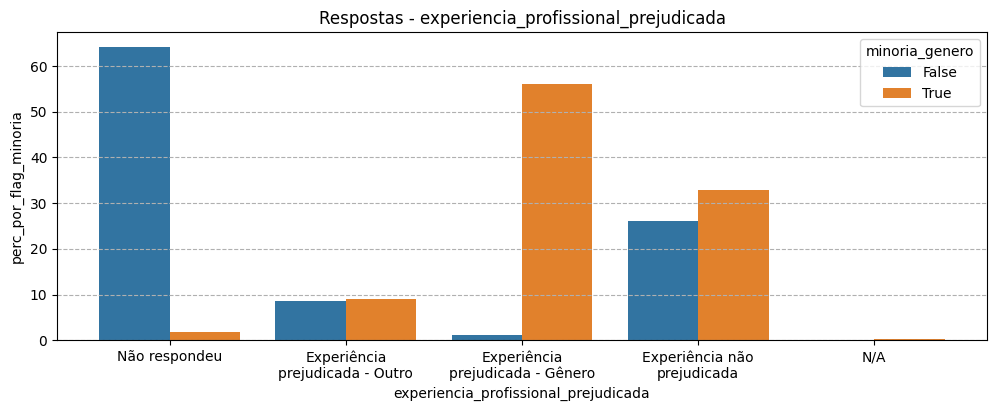

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(
    data=df_min_genero,
    x='Resposta',
    y='perc_por_flag_minoria',
    hue='minoria_genero',
    ax=ax
)
ax.set_title('Respostas - ' + question)
ax.set_xlabel(question)

ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
plt.grid(axis='y', linestyle='--')
plt.plot()

Temos então que cerca de 55% das minorias de gênero declararam terem sua experiência profissional prejudicada por esste motivo. 65% dos não-minoria não responderam.

In [ ]:
df_min_etnia = (
    df
    .assign(minoria_etnia=lambda df_: df_['P1_c'] != 'Branca')
    .fillna(-1)
    [['P0', 'minoria_etnia', 'P1_e_1', 'P1_e_2']]
    .groupby(['minoria_etnia', 'P1_e_1', 'P1_e_2'])
    .agg(num_pessoas=('P0', 'nunique'))
    .reset_index()
    .assign(
        perc_por_flag_minoria=lambda df_: (
            (100 * df_['num_pessoas']) 
            / (df_.groupby('minoria_etnia')['num_pessoas'].transform('sum'))
        ).round(decimals=2),
        Resposta=lambda df_: np.select(
            [
                ((df_['P1_e_1'] == -1) & (df_['P1_e_2'] == -1)),
                ((df_['P1_e_1'] == 0) & (df_['P1_e_2'] == 0)),
                ((df_['P1_e_1'] == 1) & (df_['P1_e_2'] == 0)),
                ((df_['P1_e_1'] == 0) & (df_['P1_e_2'] == 1)),
                ((df_['P1_e_1'] == 1) & (df_['P1_e_2'] == 1)),
            ], 
            [
                'Não respondeu',
                'Experiência prejudicada - Outro',
                'Experiência não prejudicada',
                'Experiência prejudicada - Etnia',
                'N/A'
            ]
        )
    )
)

[]

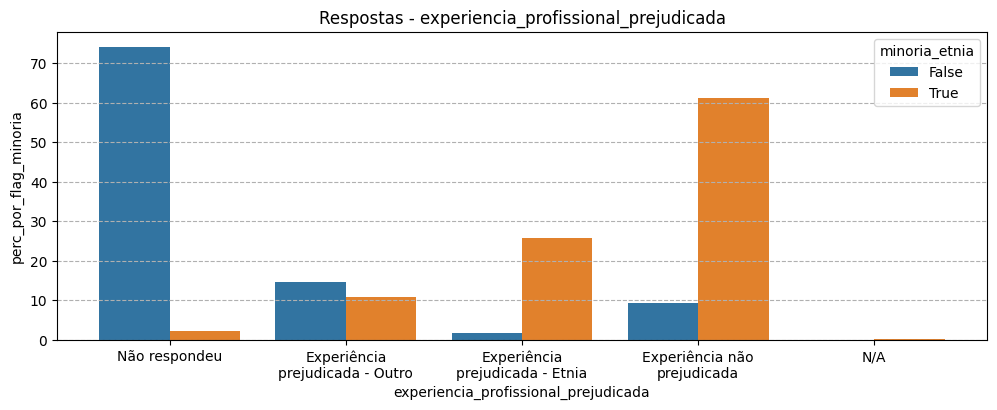

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(
    data=df_min_etnia,
    x='Resposta',
    y='perc_por_flag_minoria',
    hue='minoria_etnia',
    ax=ax
)
ax.set_title('Respostas - ' + question)
ax.set_xlabel(question)

ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
plt.grid(axis='y', linestyle='--')
plt.plot()

O mesmo fenômeno não foi observado para minorias de gênero. A maioria dos não-minorias não respondeu, e a maioria dos minorias respondeu que não foi prejudicado.

In [ ]:
df_min_pcd = (
    df
    .assign(minoria_pcd=lambda df_: df_['P1_d'] != 'Não')
    .fillna(-1)
    [['P0', 'minoria_pcd', 'P1_e_1', 'P1_e_4']]
    .groupby(['minoria_pcd', 'P1_e_1', 'P1_e_4'])
    .agg(num_pessoas=('P0', 'nunique'))
    .reset_index()
    .assign(
        perc_por_flag_minoria=lambda df_: (
            (100 * df_['num_pessoas']) 
            / (df_.groupby('minoria_pcd')['num_pessoas'].transform('sum'))
        ).round(decimals=2),
        Resposta=lambda df_: np.select(
            [
                ((df_['P1_e_1'] == -1) & (df_['P1_e_4'] == -1)),
                ((df_['P1_e_1'] == 0) & (df_['P1_e_4'] == 0)),
                ((df_['P1_e_1'] == 1) & (df_['P1_e_4'] == 0)),
                ((df_['P1_e_1'] == 0) & (df_['P1_e_4'] == 1)),
                ((df_['P1_e_1'] == 1) & (df_['P1_e_4'] == 1)),
            ], 
            [
                'Não respondeu',
                'Experiência prejudicada - Outro',
                'Experiência não prejudicada',
                'Experiência prejudicada - PCD',
                'N/A'
            ]
        )
    )
)

[]

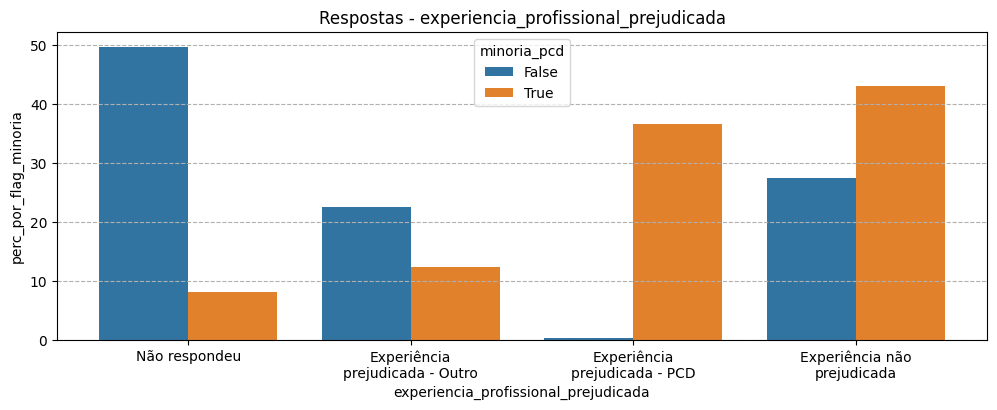

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(
    data=df_min_pcd,
    x='Resposta',
    y='perc_por_flag_minoria',
    hue='minoria_pcd',
    ax=ax
)
ax.set_title('Respostas - ' + question)
ax.set_xlabel(question)

ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
plt.grid(axis='y', linestyle='--')
plt.plot()

Dentre PCDs, a proporção de pessoas com experiência prejudicada por ser PCD e que não tiveram experiência prejudicada é bastante similar, com uma leve maior proporção de experiência não prejudicada.

## Aspectos prejudicados

In [ ]:
col_id_prefix = 'P1_f_'
question = questions_df.loc[questions_df.col_id == f'{col_id_prefix[:-1]}'].Pergunta.values[0]

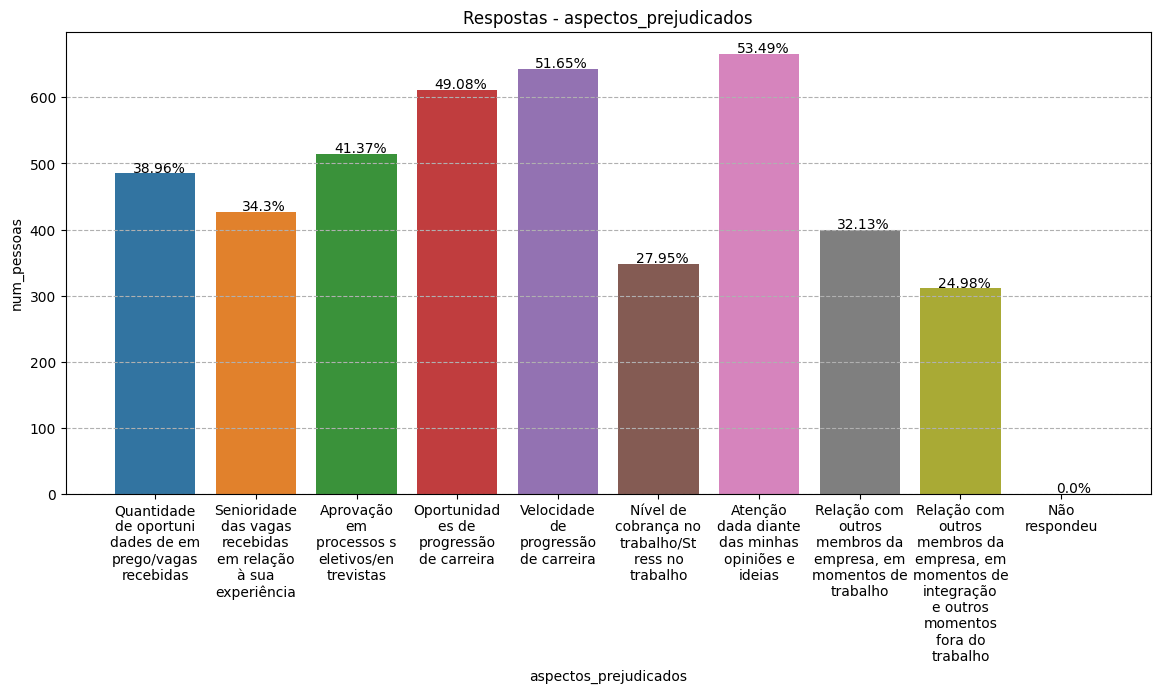

In [ ]:
# Vamos filtrar pessoas que responderam algo diferente de nulo ou não se sentiu prejudicado
plot_multiple_choice_questions(
    df.loc[df.P1_e_1 == 0], 'P1_f_', question, 11, -0.1, 2, figsize=(14, 6)
)

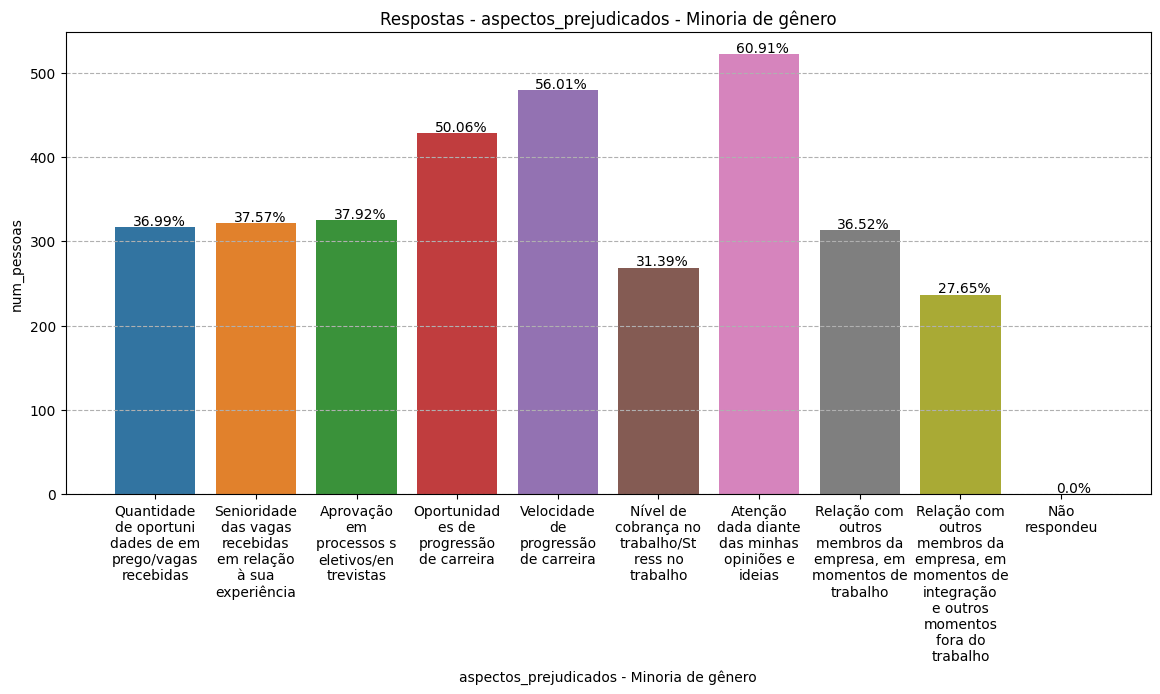

In [ ]:
# Vamos filtrar pessoas que responderam algo diferente de nulo ou não se sentiu prejudicado e que são minorias de gênero
plot_multiple_choice_questions(
    df
    .loc[df.P1_e_1 == 0]
    .loc[lambda df_: df_['P1_b'] != 'Masculino'], 
    'P1_f_', 
    question + ' - Minoria de gênero', 
    11, 
    -0.1, 
    2, 
    figsize=(14, 6)
)

## Vive no Brasil

In [ ]:
(
    df
    .P1_g
    .value_counts(normalize=True, dropna=False)
    .reset_index()
    .rename(columns={'P1_g': 'Mora no Brasil'})
)

,Mora no Brasil,proportion
0,1,0.97714
1,0,0.02286


In [ ]:
(
    df
    .P1_i_1
    .value_counts(normalize=True, dropna=False)
    .reset_index()
    .rename(columns={'P1_i_1': 'UF'})
    .assign(proportion_cumsum=lambda df_: df_['proportion'].cumsum())
    .round(decimals=4)
)

,UF,proportion,proportion_cumsum
0,SP,0.3916,0.3916
1,MG,0.1052,0.4969
2,RJ,0.0826,0.5794
3,PR,0.0794,0.6588
4,RS,0.0550,0.7138
5,SC,0.0472,0.7610
6,DF,0.0331,0.7941
7,BA,0.0293,0.8234
8,CE,0.0253,0.8487
9,PE,0.0234,0.8721


Concentração muito grande de profissionais morando no estado de SP

In [ ]:
(
    df
    .P1_i_2
    .value_counts(normalize=True, dropna=False)
    .reset_index()
    .rename(columns={'P1_i_2': 'Região'})
    .assign(proportion_cumsum=lambda df_: df_['proportion'].cumsum())
    .round(decimals=4)
)

,Região,proportion,proportion_cumsum
0,Sudeste,0.5995,0.5995
1,Sul,0.1816,0.7810
2,Nordeste,0.1149,0.8959
3,Centro-oeste,0.0650,0.9609
4,NaN,0.0234,0.9843
5,Norte,0.0157,1.0000


In [ ]:
(
    df
    .P1_j
    .value_counts(normalize=True, dropna=False)
    .reset_index()
    .rename(columns={'P1_j': 'Mudou de estado'})
)

,Mudou de estado,proportion
0,1.0,0.776119
1,0.0,0.201020
2,NaN,0.022860


Interessantemente, 78% dos profissionais mudou de estado. Vamos avaliar as migrações

In [ ]:
(
    df
    .P1_k.value_counts(normalize=True, dropna=False)
    .reset_index()
    .rename(columns={'P1_k': 'Estado de origem'})
)

,Estado de origem,proportion
0,NaN,0.798980
1,São Paulo (SP),0.031173
2,Minas Gerais (MG),0.027017
3,Rio de Janeiro (RJ),0.023238
4,Bahia (BA),0.013792
5,Paraná (PR),0.012658
6,Rio Grande do Sul (RS),0.012280
7,Pernambuco (PE),0.008313
8,Pará (PA),0.007935
9,Ceará (CE),0.007935


In [ ]:
df.loc[df.P1_j == 1].P1_k.value_counts(normalize=True, dropna=False)

P1_k
NaN    1.0
Name: proportion, dtype: float64

In [ ]:
(
    df
    .loc[df.P1_j == 0]
    .P1_k.value_counts(normalize=True, dropna=False)
    .reset_index()
    .rename(columns={'P1_k': 'Estado de origem'})
)

,Estado de origem,proportion
0,São Paulo (SP),0.155075
1,Minas Gerais (MG),0.134398
2,Rio de Janeiro (RJ),0.115602
3,Bahia (BA),0.068609
4,Paraná (PR),0.062970
5,Rio Grande do Sul (RS),0.061090
6,Pernambuco (PE),0.041353
7,Pará (PA),0.039474
8,Ceará (CE),0.039474
9,Santa Catarina (SC),0.032895


Na verdade, para a pergunta de "Mudou de estado", o valor 1 deve significar que não mudou de estado. Sendo assim, 20% da base que de fato mudou de estado.  

Ainda assim, vamos estudar a migração, com isso em mente

In [ ]:
pd.concat([
    (
        df
        .loc[df.P1_j == 0]
        .P1_k.value_counts(normalize=True, dropna=False)
        .reset_index()
        .rename(columns={'P1_k': 'Estado de origem'})
        .head(5)
    ),
    (
        df
        .loc[df.P1_j == 0]
        .P1_i_1.value_counts(normalize=True, dropna=False)
        .reset_index()
        .rename(columns={'P1_i_1': 'Estado de destino'})
        .head(5)
    )
], axis=1)

,Estado de origem,proportion,Estado de destino,proportion
0,São Paulo (SP),0.155075,SP,0.359023
1,Minas Gerais (MG),0.134398,PR,0.112782
2,Rio de Janeiro (RJ),0.115602,SC,0.109023
3,Bahia (BA),0.068609,MG,0.064850
4,Paraná (PR),0.062970,DF,0.063910


Temos que SP é tanto o estado de maior origem das migrações, quanto o de maior quantidade de destinos. Porém, a proporção de São Paulo como estado destino é significativamente maior (cerca de 36%)

In [ ]:
# Dataframe para análise da migração
df_migracao = (
    df
    .loc[df.P1_j == 0]
    .assign(P1_k_treated=lambda df_: np.select(
        [
            df_['P1_k'].isnull(),
            df_['P1_k'] == 'Nasci/me formei fora do Brasil',
            (df_['P1_k'] != 'Nasci/me formei fora do Brasil') & (~df_['P1_k'].isnull())
        ],
        [
            None,
            'XX',
            df_['P1_k'].str.split('(').str[1]
            
        ]
    ))
    .assign(P1_k_treated=lambda df_: df_['P1_k_treated'].str.replace(')', ''))
    [['P0', 'P1_i_1', 'P1_k_treated']]
    .rename(columns={'P1_i_1': 'UF_atual', 'P1_k_treated': 'UF_origem'})
    .groupby(['UF_origem', 'UF_atual'])
    .agg(num_pessoas=('P0', 'nunique'))
    .reset_index()
)

df_migracao_pivoted = pd.pivot_table(
    df_migracao, 
    columns='UF_atual',
    index='UF_origem', 
    fill_value=0,
    aggfunc='sum'
)

df_migracao_pivoted.columns = df_migracao_pivoted.columns.droplevel()


In [ ]:
fig = px.imshow(
    df_migracao_pivoted,
    text_auto=True
)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    title='Migrações - Profissionais de dados'
)
fig.show()

## Nível de ensino

In [ ]:
def plot_bar(
    df, 
    cat_col, 
    y, 
    title, 
    max_width=10,
    plot_percentages=False, 
    perc_col='', 
    x_pad=-0.2,
    y_pad=20,
    figsize=(12, 4)
):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    sns.barplot(
        df,
        x=cat_col,
        y=y,
        ax=ax,
    )
    ax.set_title(title)
    ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
    
    if plot_percentages:
        percentage = df[perc_col].values
        for i, p in enumerate(ax.patches):
            x = p.get_x() + p.get_width() + x_pad
            y = p.get_height() + y_pad
            ax.annotate(str(percentage[i]) + '%', (x, y), ha='right')


In [ ]:
def plot_hue_bar(
    df, 
    cat_col, 
    y, 
    hue_cat_col, 
    title, 
    max_width=10,
    plot_percentages=False, 
    perc_col='', 
    figsize=(12, 4)
):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    sns.barplot(
        df,
        x=cat_col,
        y=y,
        hue=hue_cat_col,
        ax=ax,
    )
    ax.set_title(title)
    ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
    
    if plot_percentages:
        a = [p.get_height() for p in ax.patches]
        patch = [p for p in ax.patches]
        categories = df_ensino_por_genero[cat_col].unique().tolist()
        hue_categories = df_ensino_por_genero[hue_cat_col].unique().tolist()
        Number_of_categories=len(categories)

        for i, cat in enumerate(categories):
            for j, hue_cat  in enumerate(hue_categories):
                percentage = df_ensino_por_genero.loc[lambda df_: (df_[cat_col] == cat) & (df_[hue_cat_col] == hue_cat)].perc_genero.values
                if len(percentage) > 0:
                    percentage = percentage[0].astype(str) + '%'
                x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
                y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
                ax.annotate(percentage, (x, y), size = 10)

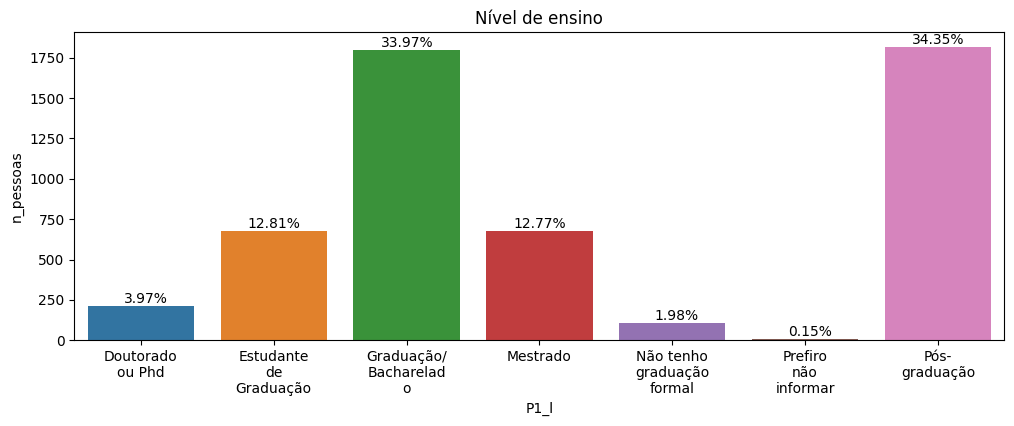

In [ ]:
plot_bar(
    df
    .groupby('P1_l')
    .agg(n_pessoas=('P0', 'nunique'))
    .reset_index()
    .assign(perc=lambda df_: (100 * df_['n_pessoas'] / df_['n_pessoas'].sum()).round(decimals=2)),
    cat_col='P1_l',
    y='n_pessoas',
    title='Nível de ensino',
    plot_percentages=True,
    perc_col='perc'
)

In [ ]:
df_ensino_por_genero = (
    df
    .loc[lambda df_: df_['P1_b'].isin(['Masculino', 'Feminino'])]
    .groupby(['P1_l', 'P1_b']).agg(n_pessoas=('P0', 'nunique'))
    .reset_index()
    .assign(perc_genero=lambda df_: (100 * df_['n_pessoas'] / df_.groupby('P1_b')['n_pessoas'].transform('sum')).round(decimals=2))
)

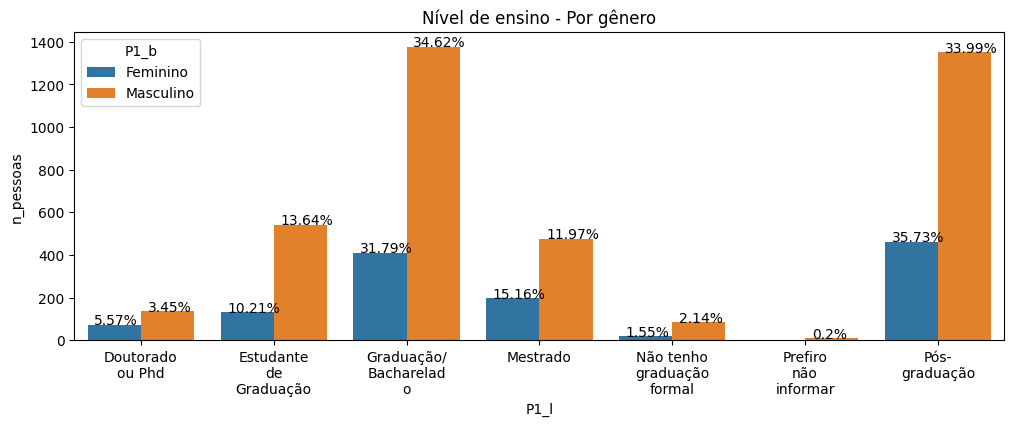

In [ ]:
plot_hue_bar(
    df_ensino_por_genero,
    cat_col='P1_l',
    y='n_pessoas',
    hue_cat_col='P1_b',
    title='Nível de ensino - Por gênero',
    plot_percentages=True,
    perc_col='perc_genero'
)

Temos uma grande concentração de profissionais com graduação e pós-graduação. A proporção de homens/mulheres dentre as classes de nível de ensino não está muito diferente, não podendo ser uma justificativa para diferenças significativas nas carreiras entre os dois

## Área de Formação

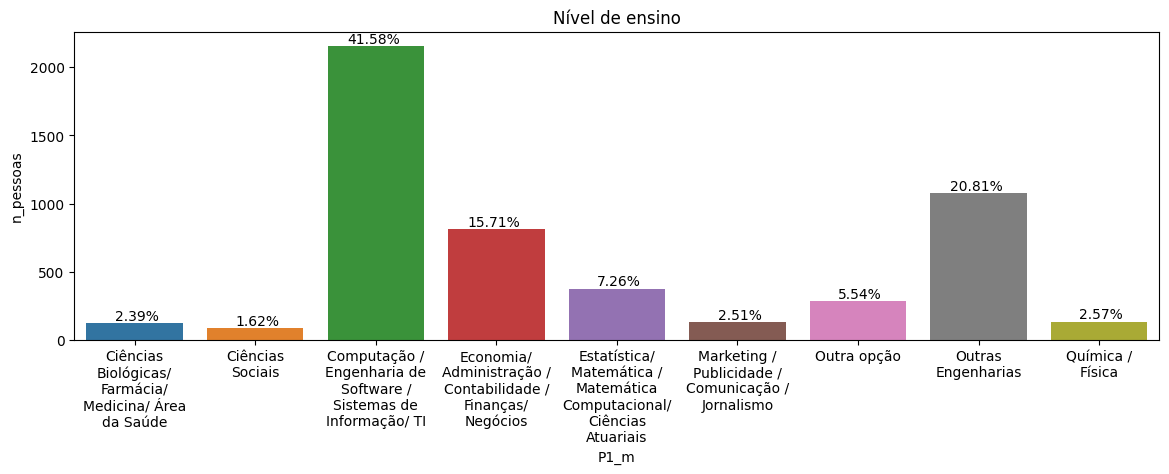

In [ ]:
plot_bar(
    df
    .groupby('P1_m')
    .agg(n_pessoas=('P0', 'nunique'))
    .reset_index()
    .assign(perc=lambda df_: (100 * df_['n_pessoas'] / df_['n_pessoas'].sum()).round(decimals=2)),
    cat_col='P1_m',
    y='n_pessoas',
    title='Nível de ensino',
    max_width=15,
    figsize=(14, 4),
    plot_percentages=True,
    perc_col='perc'
)

# Parte 2 - Dados sobre carreira

In [ ]:
df.P2_a.value_counts(normalize=True, dropna=False).reset_index()

,P2_a,proportion
0,Empregado (CLT),0.680899
1,Empreendedor ou Empregado (CNPJ),0.104855
2,"Desempregado, buscando recolocação",0.068203
3,Estagiário,0.039108
4,Servidor Público,0.027584
5,Vivo no Brasil e trabalho remoto para empresa ...,0.021916
6,Somente Estudante (graduação),0.014736
7,Vivo fora do Brasil e trabalho para empresa de...,0.012091
8,Trabalho na área Acadêmica/Pesquisador,0.011903
9,Freelancer,0.009635


In [ ]:
questions_df.iloc[20:50, [0, 1]]

,col_id,Pergunta
20,P1_f_9,"Relação com outros membros da empresa, em mome..."
21,P1_g,vive_no_brasil
22,P1_i,Estado onde mora
23,P1_i_1,uf onde mora
24,P1_i_2,Regiao onde mora
25,P1_j,Mudou de Estado?
26,P1_k,Regiao de origem
27,P1_l,Nivel de Ensino
28,P1_m,Área de Formação
29,P2_a,Qual sua situação atual de trabalho?
